<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [12]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [13]:
scores = pd.read_csv('sat_scores.csv')
scores


sat_dict = {'State':list(scores['State'].values),
           'Rate':list(scores['Rate'].values),
           'Verbal':list(scores['Verbal'].values),
           'Math':list(scores['Math'].values)}

print(sat_dict)

{'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': [82, 81, 79, 77, 72, 71, 71, 69, 69, 68, 67, 65, 65, 63, 60, 57, 56, 55, 54, 53, 53, 52, 51, 51, 34, 33, 31, 26, 23, 18, 17, 13, 13, 12, 12, 11, 11, 9, 9, 9, 8, 8, 8, 7, 6, 6, 5, 5, 4, 4, 4, 45], 'Verbal': [509, 499, 511, 495, 520, 501, 500, 511, 506, 510, 501, 508, 493, 491, 499, 486, 482, 526, 498, 527, 493, 485, 514, 498, 523, 509, 539, 534, 539, 527, 543, 562, 551, 576, 550, 547, 561, 580, 577, 559, 562, 567, 577, 564, 584, 562, 575, 593, 577, 592, 566, 506], 'Math': [510, 513, 515, 505, 516, 499, 499, 506, 500, 501, 499, 510, 499, 489, 501, 488, 474, 526, 499, 527, 499, 515, 510, 517, 525, 515, 542, 439, 539, 512, 542, 553, 542, 589, 550, 545, 572, 589, 

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [14]:
sat_df = pd.DataFrame(sat_dict)
scores = pd.read_csv('sat_scores.csv')
print(scores)

print(sat_dict)

print(sat_df.dtypes)

print(scores.dtypes)




   State  Rate  Verbal  Math
0     CT    82     509   510
1     NJ    81     499   513
2     MA    79     511   515
3     NY    77     495   505
4     NH    72     520   516
5     RI    71     501   499
6     PA    71     500   499
7     VT    69     511   506
8     ME    69     506   500
9     VA    68     510   501
10    DE    67     501   499
11    MD    65     508   510
12    NC    65     493   499
13    GA    63     491   489
14    IN    60     499   501
15    SC    57     486   488
16    DC    56     482   474
17    OR    55     526   526
18    FL    54     498   499
19    WA    53     527   527
20    TX    53     493   499
21    HI    52     485   515
22    AK    51     514   510
23    CA    51     498   517
24    AZ    34     523   525
25    NV    33     509   515
26    CO    31     539   542
27    OH    26     534   439
28    MT    23     539   539
29    WV    18     527   512
30    ID    17     543   542
31    TN    13     562   553
32    NM    13     551   542
33    IL    12

We can notice here that when we input the dictionary, the columns are not ordered whereas when theyre loaded from file they are.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [15]:
sat_df.head(10)

,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520
5,499,71,RI,501
6,499,71,PA,500
7,506,69,VT,511
8,500,69,ME,506
9,501,68,VA,510


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [23]:
data_dictionary = {'sat_df':sat_df.shape,
                   'Math':{'variable type':'int64',
                           'variable description':'SAT Math score per state'
                          },
                   'Rate':{'variable type':'int 64',
                           'variable description':'SAT rate per state'},
                   'State':{'variable type':'object',
                           'variable description':'State to which the scores are attributed'},
                   'Verbal':{'variable type':'int 64',
                            'variable description':'SAT verbal score per state'}
                  }

print(data_dictionary)

{'sat_df': (52, 4), 'Math': {'variable type': 'int64', 'variable description': 'SAT Math score per state'}, 'Rate': {'variable type': 'int 64', 'variable description': 'SAT rate per state'}, 'State': {'variable type': 'object', 'variable description': 'State to which the scores are attributed'}, 'Verbal': {'variable type': 'int 64', 'variable description': 'SAT verbal score per state'}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

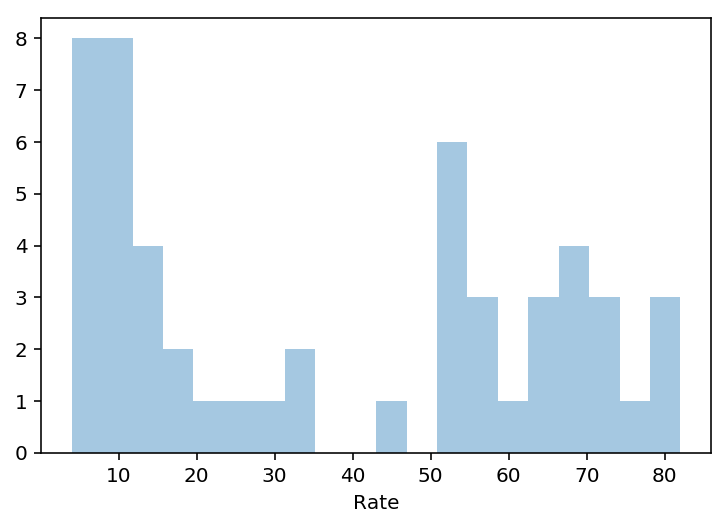

In [22]:
#Plotting distribution for Rate

y = sat_df['Rate']
x = pd.Series(y, name='Distribution for Rate')
Rate = sns.distplot(y,kde=False,bins=20)

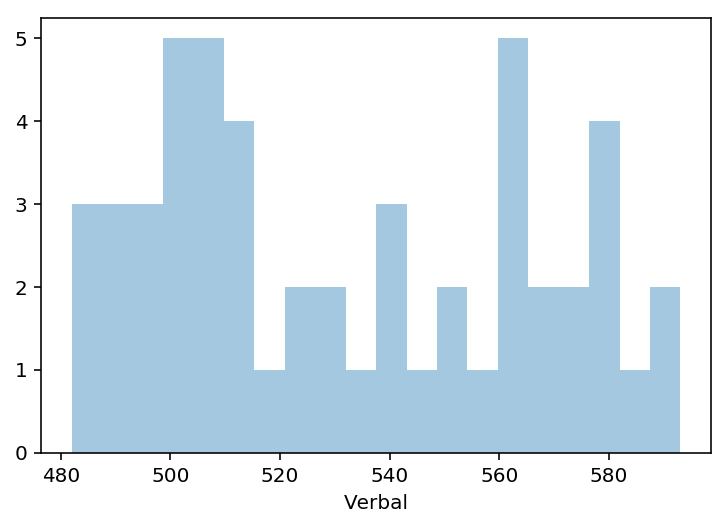

In [21]:
# Plotting distribution for Verbal
y = sat_df['Verbal']
x = pd.Series(y, name='Distribution for Verbal')
Verbal = sns.distplot(y,kde=False,bins=20)


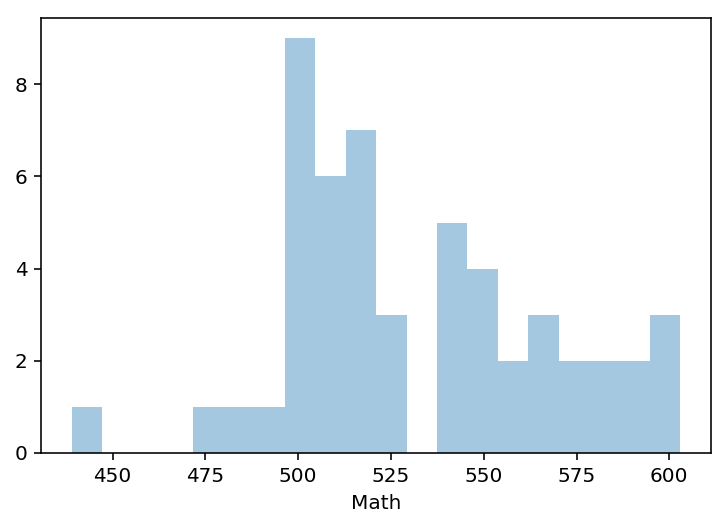

In [20]:
import seaborn as sns

# Plotting distribution for Math

y = sat_df['Math']
x = pd.Series(y, name="Distribution for Math")
Math = sns.distplot(y,kde=False,bins=20)









### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

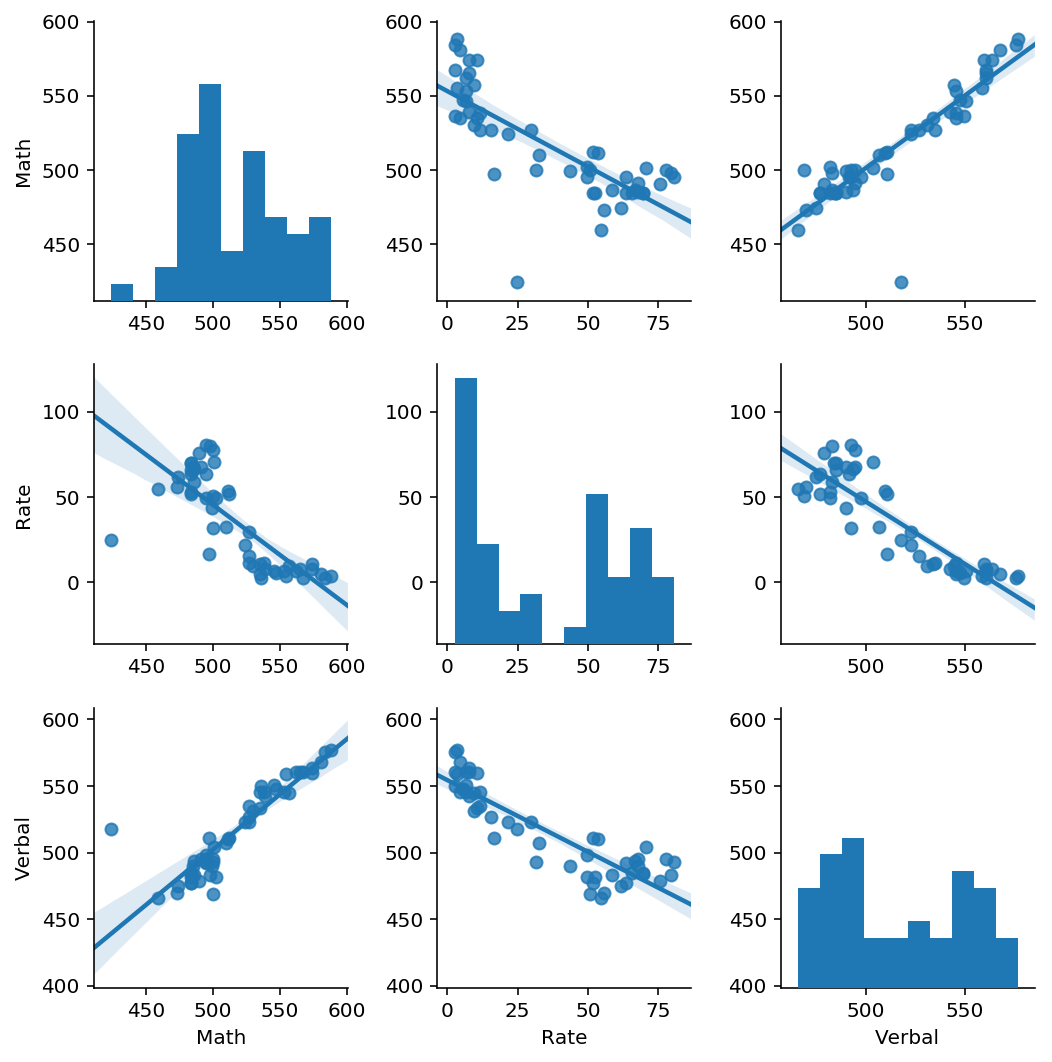

In [63]:
sns.pairplot(sat_df,kind='reg');

What can be inferred from this linear regression pairplot is the following:

1) The variables that have a negative linear relationship are Math/Rate and Verbal/Rate.
2) The variables that have a positive linear relationship are Math/Verbal. 

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

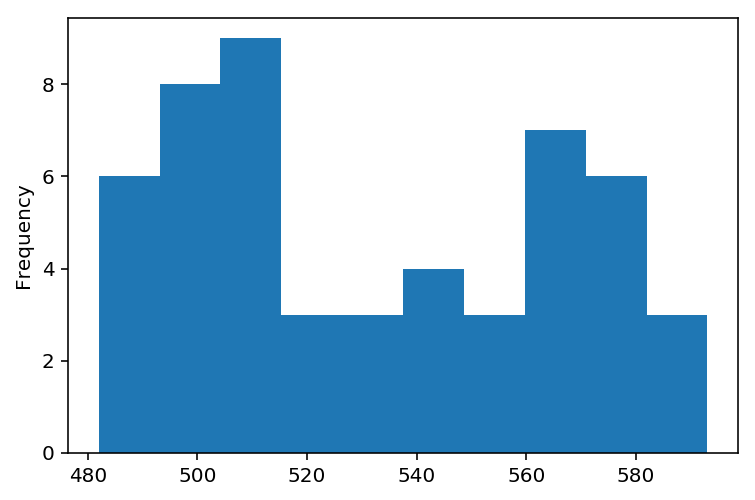

In [24]:
# Plotting for Verbal

sat_df['Verbal'].plot(kind='hist');

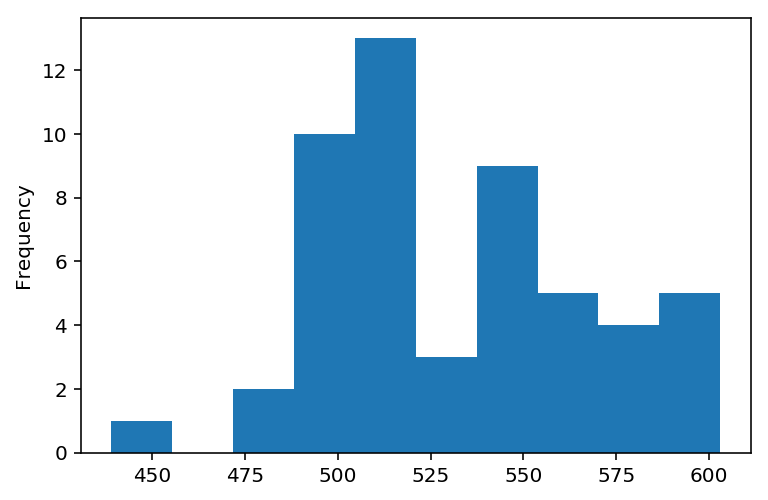

In [25]:
# Plotting for Math

sat_df['Math'].plot(kind='hist');

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

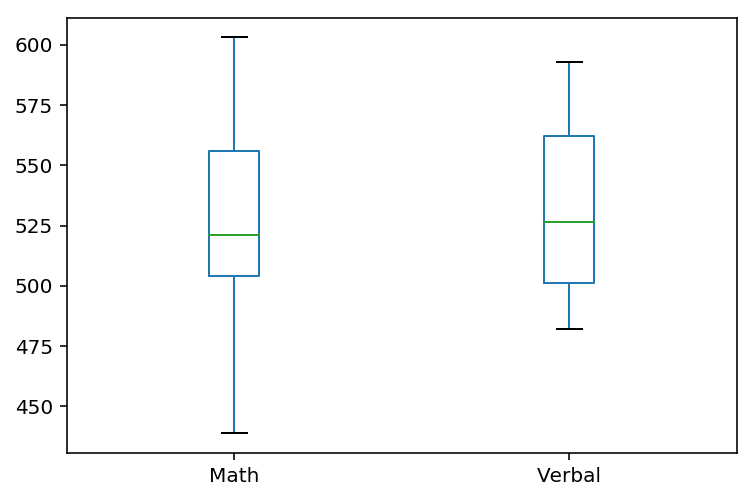

In [26]:
sat_df[['Math','Verbal']].plot(kind='box');

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [27]:
# In order for them to make sense on the same chart, it is important to standardize the variables. 

sat_df['Math'] = (sat_df['Math']-np.mean(sat_df['Math'])/np.std(sat_df['Math']))

sat_df['Verbal'] = (sat_df['Verbal']-np.mean(sat_df['Verbal'])/np.std(sat_df['Verbal']))

sat_df['Rate'] = (sat_df['Rate']-np.mean(sat_df['Rate'])/np.std(sat_df['Rate']))

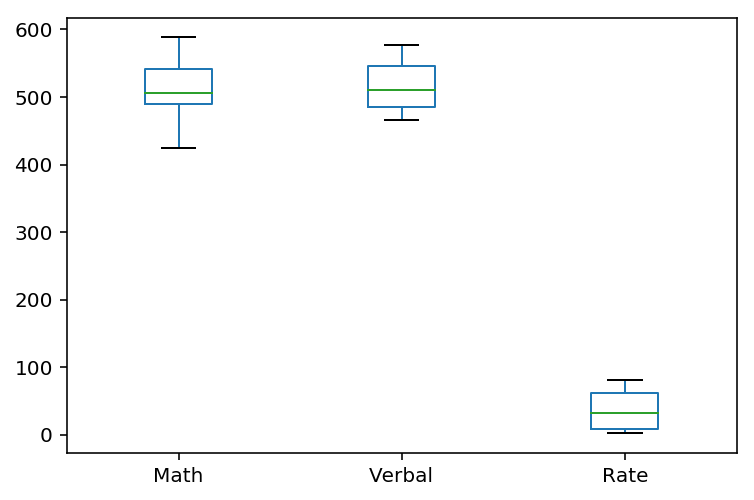

In [28]:
sat_df[['Math','Verbal','Rate']].plot(kind='box')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [53]:
verbal_mean = np.mean(sat_df['Verbal'])

In [54]:
# Using a mask

sat_df.loc[sat_df['Verbal']>verbal_mean]

,Math,Rate,State,Verbal
26,527.098269,29.625865,CO,522.836619
27,424.098269,24.625865,OH,517.836619
28,524.098269,21.625865,MT,522.836619
30,527.098269,15.625865,ID,526.836619
31,538.098269,11.625865,TN,545.836619
32,527.098269,11.625865,NM,534.836619
33,574.098269,10.625865,IL,559.836619
34,535.098269,10.625865,KY,533.836619
35,530.098269,9.625865,WY,530.836619
36,557.098269,9.625865,MI,544.836619


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [30]:
sat_df.loc[sat_df['Verbal']>np.median(sat_df['Verbal'])]

,Math,Rate,State,Verbal
19,512.098269,51.625865,WA,510.836619
26,527.098269,29.625865,CO,522.836619
27,424.098269,24.625865,OH,517.836619
28,524.098269,21.625865,MT,522.836619
29,497.098269,16.625865,WV,510.836619
30,527.098269,15.625865,ID,526.836619
31,538.098269,11.625865,TN,545.836619
32,527.098269,11.625865,NM,534.836619
33,574.098269,10.625865,IL,559.836619
34,535.098269,10.625865,KY,533.836619


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [31]:
column = sat_df['Verbal']-sat_df['Math']

diff_df = pd.DataFrame(column)

diff_df.rename(columns={0:'Difference'}, inplace=True)

diff_df

,Difference
0,-2.26165
1,-15.26165
2,-5.26165
3,-11.26165
4,2.73835
5,0.73835
6,-0.26165
7,3.73835
8,4.73835
9,7.73835


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [32]:
#1 : The 10 States with the greatest gap between verbal and math scores where verbal is greater than math.

ten_greatest = diff_df.nlargest(10,'Difference')

ten_greatest


,Difference
27,93.73835
29,13.73835
50,13.73835
45,10.73835
9,7.73835
31,7.73835
32,7.73835
16,6.73835
8,4.73835
41,4.73835


In [33]:
#2 : The 10 States with the greatest gap between verbal and math scores where math is greater than verbal.

ten_biggest = diff_df.nsmallest(10,'Difference')

ten_biggest

,Difference
21,-31.26165
23,-20.26165
1,-15.26165
33,-14.26165
44,-13.26165
36,-12.26165
47,-11.26165
3,-11.26165
37,-10.26165
51,-9.26165


In [34]:
ten_greatest.head(3)

,Difference
27,93.73835
29,13.73835
50,13.73835


In [35]:
ten_biggest.head(3)

,Difference
21,-31.26165
23,-20.26165
1,-15.26165


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [58]:
correlation_matrix = sat_df.corr()

correlation_matrix

,Math,Rate,Verbal
Math,1.000000,-0.773746,0.899871
Rate,-0.773746,1.000000,-0.886432
Verbal,0.899871,-0.886432,1.000000


# What does the correlation matrix tell you?

When the correlation coefficient between two variables is greater than 0, we say that the variables have a positive linear relationship (and vice-versa). 
Therefore, what can be inferred from the correlation matrix is the following:

1) The Math/Rate and Verbal/Rate linear relationships are both negative. 
2) The Math/Verbal linear relationship is positive. 



<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [38]:
sat_df.describe()

,Math,Rate,Verbal
count,52.000000,52.000000,52.000000
mean,516.598269,35.779712,515.855849
std,36.014975,27.301788,33.236225
min,424.098269,2.625865,465.836619
25%,489.098269,7.625865,484.836619
50%,506.098269,32.125865,510.336619
75%,540.848269,62.125865,545.836619
max,588.098269,80.625865,576.836619


# What do the rows indicate?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [62]:
covariance_matrix = sat_df.cov()

covariance_matrix

,Math,Rate,Verbal
Math,1297.078431,-760.803922,1077.147059
Rate,-760.803922,745.387632,-804.355958
Verbal,1077.147059,-804.355958,1104.646682


Questions 1,2,3 are all answered in this paragraph

The problem with covariances is that they are hard to compare: when you calculate the covariance of a set of heights and weights, as expressed in (respectively) meters and kilograms, you will get a different covariance from when you do it in other units (which already gives a problem for people doing the same thing with or without the metric system!), but also, it will be hard to tell if (e.g.) height and weight 'covariate better' than, e.g. the length of your toes and fingers, simply because the 'scale' you calculate the covariance on is different.

The solution to this is to 'normalize' the covariance: you divide the covariance by something that represents the diversity and scale in both the covariates, and end up with a value that is assured to be between -1 and 1: the correlation. Whatever unit your original variables were in, you will always get the same result, and this will also ensure that you can, to a certain degree, compare whether two variables 'correlate' more than two others, simply by comparing their correlation.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [41]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [42]:
drugs = pd.read_csv('drug-use-by-age.csv')

drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [43]:
drugs.isnull().sum()

# There are no missing values. 

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [44]:
drugs.dtypes

# It requires cleaning because here for example age and crack frequency are both objects, when they should be floats or integers. This will affect my approach to the EDA because I will have to dedicate more time to cleaning the data than actually analyzing it.


age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [45]:
drugs.shape

(17, 28)

In [46]:
drugs.columns

Index(['age', 'n', 'alcohol-use', 'alcohol-frequency', 'marijuana-use',
       'marijuana-frequency', 'cocaine-use', 'cocaine-frequency', 'crack-use',
       'crack-frequency', 'heroin-use', 'heroin-frequency', 'hallucinogen-use',
       'hallucinogen-frequency', 'inhalant-use', 'inhalant-frequency',
       'pain-releiver-use', 'pain-releiver-frequency', 'oxycontin-use',
       'oxycontin-frequency', 'tranquilizer-use', 'tranquilizer-frequency',
       'stimulant-use', 'stimulant-frequency', 'meth-use', 'meth-frequency',
       'sedative-use', 'sedative-frequency'],
      dtype='object')

In [47]:
drugs.describe()

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,inhalant-use,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,0.294118,0.352941,3.394118,8.411765,1.388235,6.270588,14.705882,0.935294,2.805882,11.735294,1.917647,31.147059,0.382353,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,0.235772,0.333762,2.792506,15.000245,0.927283,3.166379,6.935098,0.608216,1.753379,11.485205,1.407673,85.973790,0.262762,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.100000,2.000000,0.000000,0.600000,7.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,0.000000,0.100000,0.600000,3.000000,0.600000,3.900000,12.000000,0.400000,1.400000,6.000000,0.600000,7.000000,0.200000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,0.400000,0.200000,3.200000,3.000000,1.400000,6.200000,12.000000,1.100000,3.500000,10.000000,1.800000,10.000000,0.400000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,0.500000,0.600000,5.200000,4.000000,2.000000,9.000000,15.000000,1.400000,4.200000,11.000000,3.000000,12.000000,0.600000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,0.600000,1.100000,8.600000,52.000000,3.000000,10.000000,36.000000,1.700000,5.400000,52.000000,4.100000,364.000000,0.900000,0.500000,104.000000


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

1. The hypothesis I want to test is if drug use increases with age, in other words I am looking for a correlation between the age and drugs use variable. 
2. I will report a comparison of the drug use at different ages from various perspectives using the correlation coefficient between the drug and age columns or a pairplot  

In [65]:
# Replacing the age columns with midpoints for the ranges in order to eliminate the non-numeric value issue. 

drugs['agemidpoint']=[12,13,14,15,16,17,18,19,20,21,22.5,24.5,27.5,32,42,57,75]
drugs

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency,agemidpoint
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0,12.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0,13.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5,14.0
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0,15.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0,16.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5,17.0
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0,18.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0,19.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0,20.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0,21.0


In [91]:
drugs_corr = drugs.corr()

#Extracting from the correlation matrix the different drugs for which the correlation coefficient can be considered high.

drugs_corr.loc[(drugs_corr['agemidpoint']>0.4)|(drugs_corr['agemidpoint']<-0.4)]

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,crack-use,heroin-use,hallucinogen-use,hallucinogen-frequency,inhalant-use,pain-releiver-use,pain-releiver-frequency,oxycontin-use,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,sedative-use,sedative-frequency,agemidpoint
alcohol-frequency,0.313431,0.897889,1.000000,0.260219,0.818769,0.577601,0.785050,0.546194,0.182184,-0.174622,-0.864153,0.280704,0.007087,0.251554,0.448543,-0.415026,0.291766,0.260304,0.425153,0.029867,0.201423,0.610205
hallucinogen-use,-0.295302,0.463702,0.182184,0.959353,0.528733,0.855668,0.556222,0.683674,1.000000,-0.427863,0.173030,0.909333,-0.419961,0.916777,0.862900,-0.314281,0.940008,-0.319860,0.780071,0.518700,-0.312746,-0.419403
inhalant-use,-0.368395,-0.648248,-0.864153,0.127336,-0.577792,-0.214609,-0.543499,-0.215961,0.173030,-0.137576,1.000000,0.092045,-0.342676,0.110492,-0.103745,0.158140,0.108381,-0.419717,-0.059903,0.110611,-0.293189,-0.778686
pain-releiver-use,-0.083587,0.617523,0.280704,0.966226,0.612254,0.906638,0.652764,0.805868,0.909333,-0.488187,0.092045,1.000000,-0.468617,0.976445,0.959283,-0.351856,0.961484,-0.471433,0.918051,0.636666,-0.271246,-0.460454
oxycontin-use,-0.166039,0.589219,0.251554,0.971733,0.609618,0.865626,0.603003,0.775321,0.916777,-0.442181,0.110492,0.976445,-0.474503,1.000000,0.955081,-0.355122,0.947492,-0.406369,0.895790,0.625929,-0.198329,-0.406494
stimulant-use,-0.201621,0.582241,0.291766,0.968096,0.561246,0.923954,0.618008,0.808024,0.940008,-0.452345,0.108381,0.961484,-0.409813,0.947492,0.909784,-0.327899,1.000000,-0.363358,0.894757,0.567956,-0.260968,-0.416643
stimulant-frequency,-0.114792,-0.028115,0.260304,-0.389145,-0.069454,-0.309286,-0.294260,-0.277996,-0.319860,-0.103980,-0.419717,-0.471433,0.324717,-0.406369,-0.384431,-0.180415,-0.363358,1.000000,-0.376278,-0.526289,-0.011796,0.775405
sedative-use,-0.119997,0.318268,0.029867,0.616766,0.399124,0.461914,0.438421,0.333649,0.518700,-0.231773,0.110611,0.636666,-0.378001,0.625929,0.674618,-0.245645,0.567956,-0.526289,0.663079,1.000000,-0.284234,-0.403279
agemidpoint,0.244329,0.322730,0.610205,-0.396692,0.266935,-0.212110,0.088128,-0.218859,-0.419403,0.111282,-0.778686,-0.460454,0.189695,-0.406494,-0.283523,-0.302629,-0.416643,0.775405,-0.295468,-0.403279,0.394315,1.000000


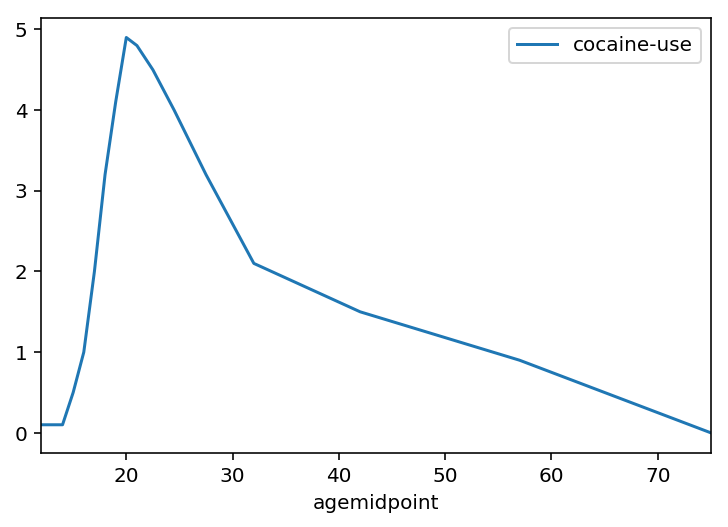

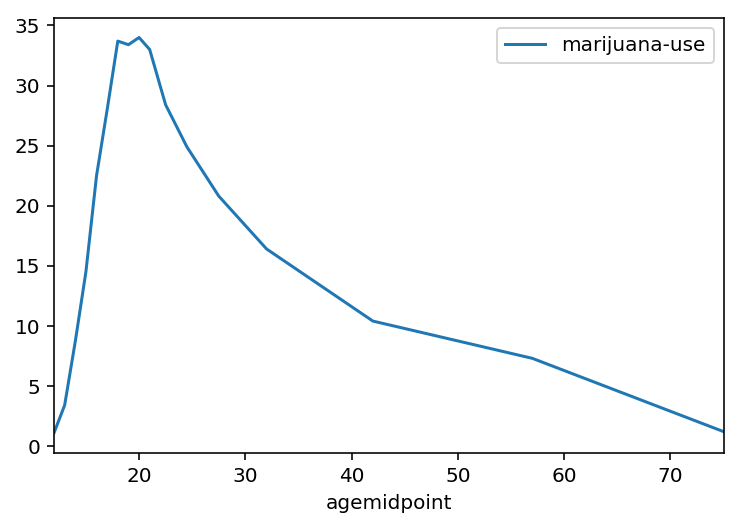

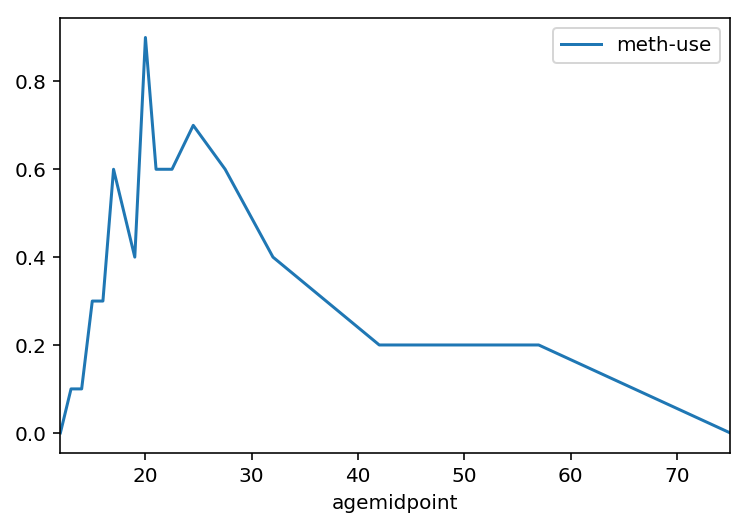

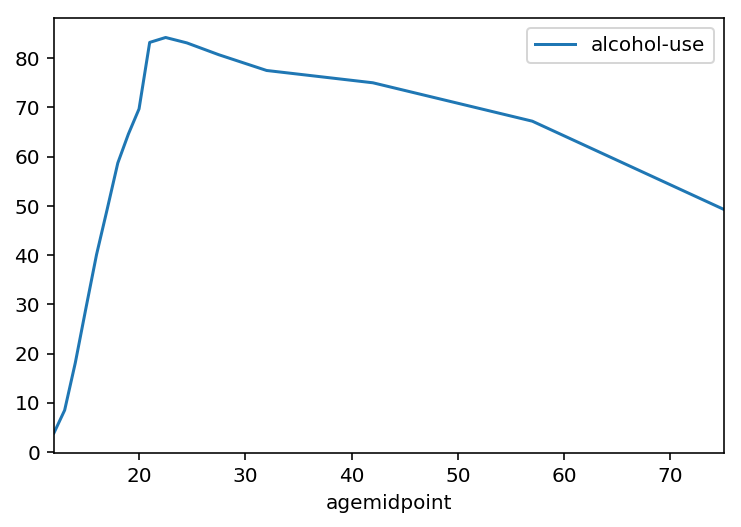

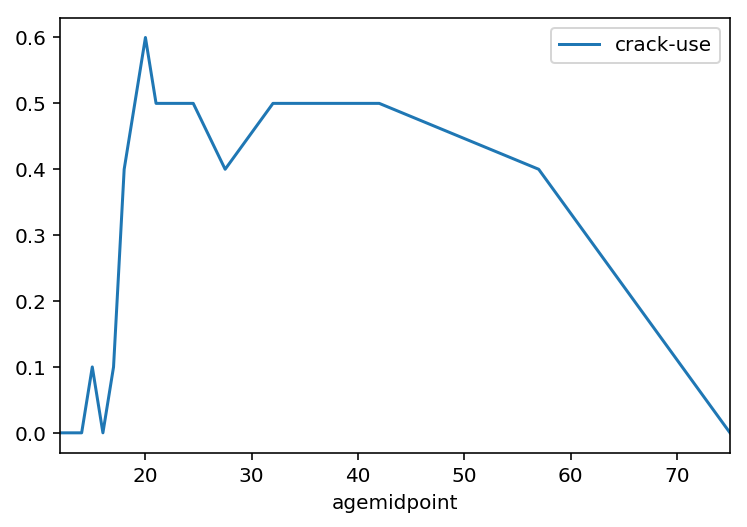

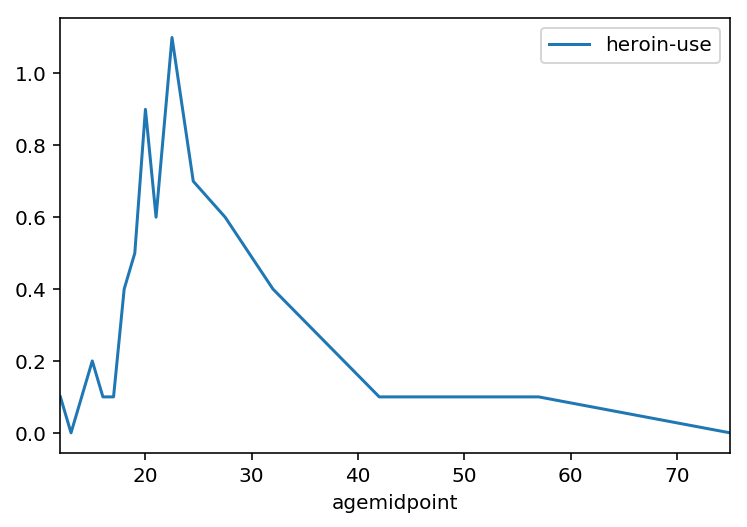

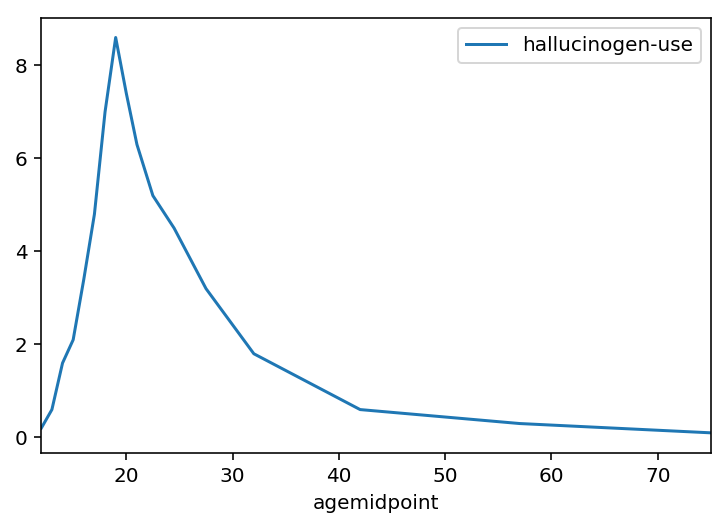

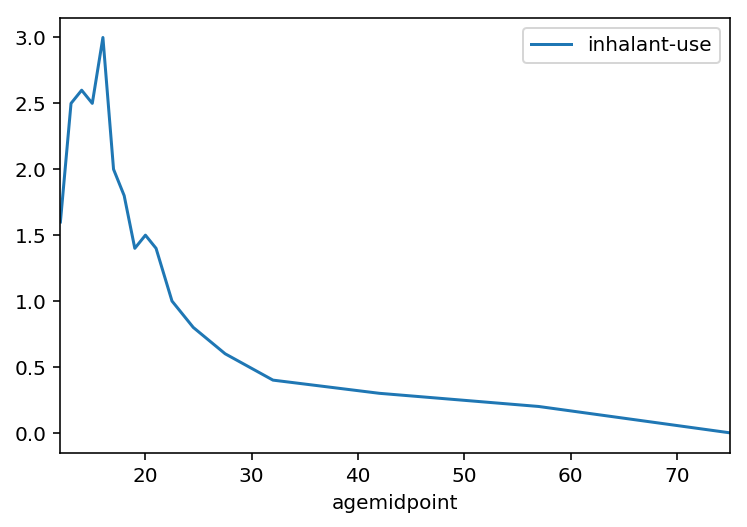

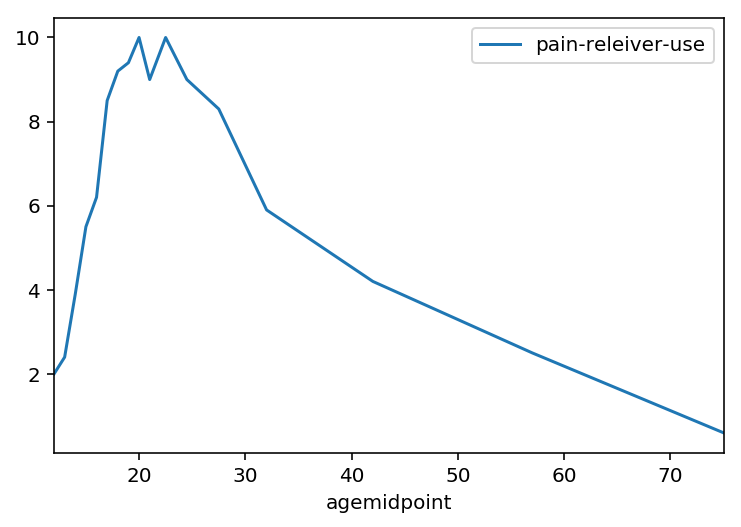

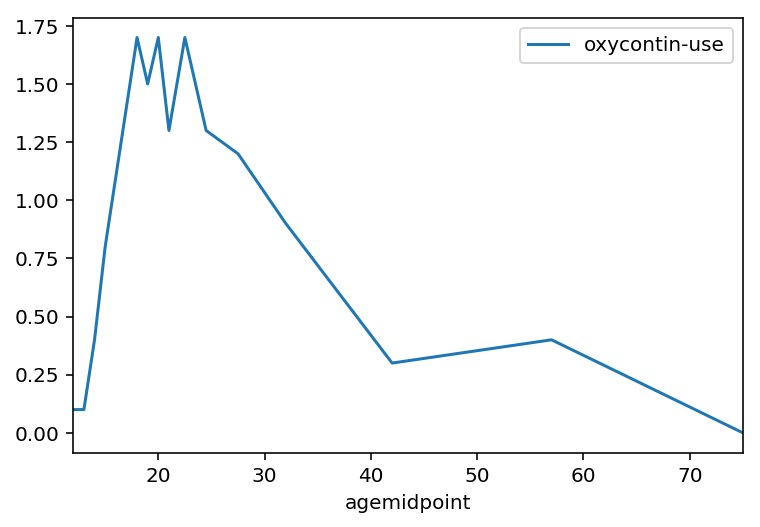

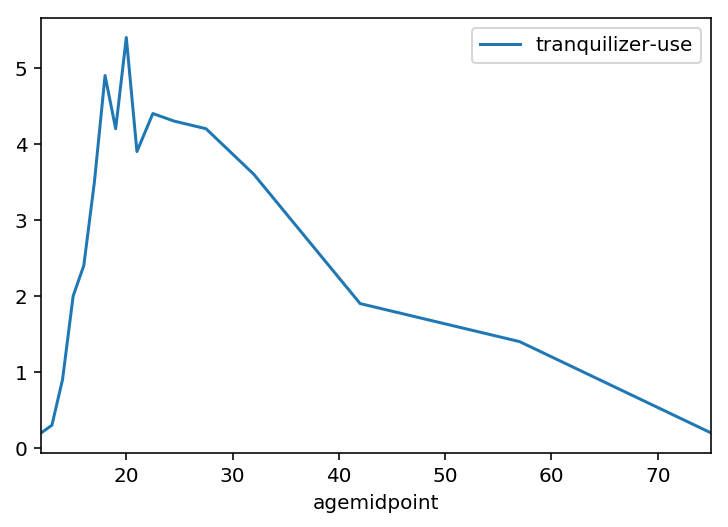

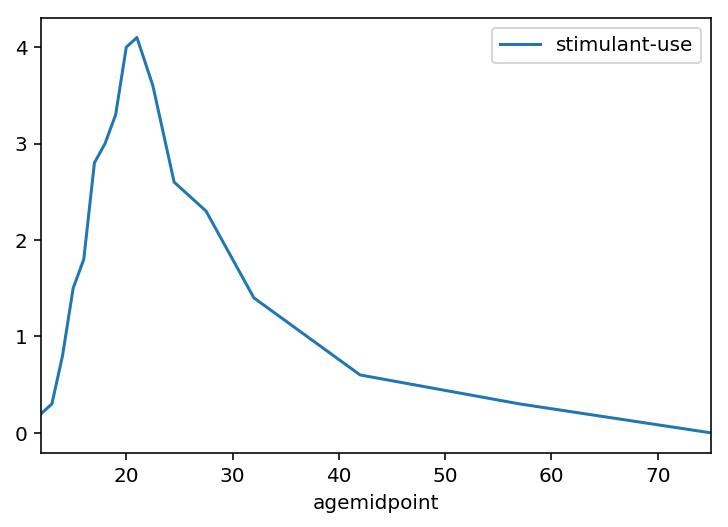

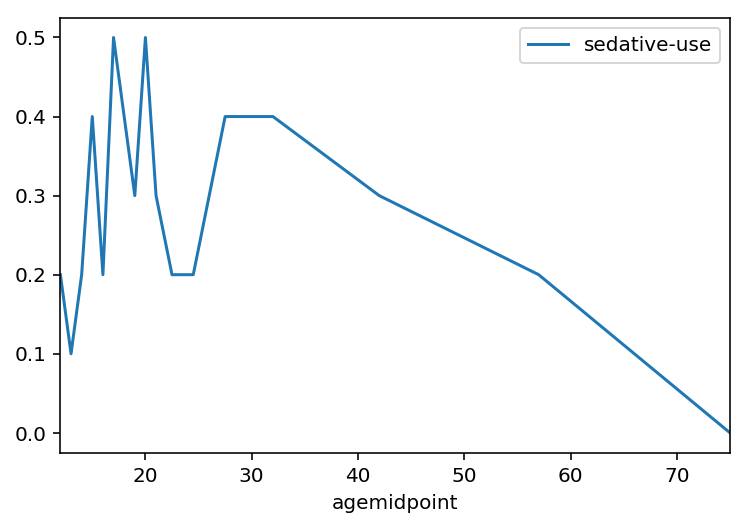

In [80]:
drugs.plot(x='agemidpoint',y='cocaine-use');
drugs.plot(x='agemidpoint',y='marijuana-use');
drugs.plot(x='agemidpoint',y='meth-use');
drugs.plot(x='agemidpoint',y='alcohol-use');
drugs.plot(x='agemidpoint',y='crack-use');
drugs.plot(x='agemidpoint',y='heroin-use');
drugs.plot(x='agemidpoint',y='hallucinogen-use');
drugs.plot(x='agemidpoint',y='inhalant-use');
drugs.plot(x='agemidpoint',y='pain-releiver-use');
drugs.plot(x='agemidpoint',y='oxycontin-use');
drugs.plot(x='agemidpoint',y='tranquilizer-use');
drugs.plot(x='agemidpoint',y='stimulant-use');
drugs.plot(x='agemidpoint',y='sedative-use');

**Report**

Based on the graphs and the correlation matrix, we are able to verify our hypothesis with the following:

1) We started by narrowing down the drug uses for which the correlation with the age column was the highest in the whole correlation matrice and the following drugs were returned with a correlation coefficient higher than 0.4 : alcohol, marijuana, cocaine, crack, heroin, hallucinogen, inhalant, pain-reliever, oxycontin, tranquilizer, stimulant, meth, sedatives. 

2) We then decided to investigate further by plotting each of these drugs in a graph and observed for each of them a peak of use around the age of 20. Certain exceptions can be pointed out regarding sedatives fro example where the use plummets from 0.5 to 0.3 at the age of 20 then rises again to 0.5 or alcohol for which the use remains quite high throughout the life of the individuals (reaches a peak of 80 at around 20 but never going under 50). However, the overall pattern remains the same with a maximum use at the age of 20. 

In conclusion to this analysis we can confirm that there is a high correlation and direct link between the age and drug use variables. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


1. 

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.